# Comparison with models

In this third and last notebook we will compare our `cloudy-maraston` (M13 and M24 with nebular emission) models with other popular SPS models: BPASS, BC03, Starburst99, and FSPS.

Again, we begin with importing the relevant modules, including `synthesizer`

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from synthesizer.grid import Grid
import cmasher as cmr 
from unyt import eV

# and set up plotting 

plt.rcParams['figure.dpi'] = 200
mpl.rcParams.update({'font.size': 12})
cmap = cmr.bubblegum

We now have a lot of grids to import into `synthesizer`!

In [3]:
grid_dir = '../grids'

grid_name_m13 = 'maraston13_kroupa-max_age:7.0_cloudy-c23.01-sps'
grid_m13 = Grid(grid_name_m13, grid_dir=grid_dir, read_lines=True)

grid_name_bc03 = 'bc03_chabrier03-0.1,100-max_age:7.0_cloudy-c23.01-sps'
grid_bc03 = Grid(grid_name_bc03, grid_dir=grid_dir, read_lines=True)

grid_name_bpass = 'bpass-2.2.1-bin_bpl-0.1,1.0,100.0-1.3,2.35-max_age:7.0_cloudy-c23.01-sps'
grid_bpass = Grid(grid_name_bpass, grid_dir=grid_dir, read_lines=True)

grid_name_bpass_sin = 'bpass-2.2.1-sin_bpl-0.1,1.0,100.0-1.3,2.35-max_age:7.0_cloudy-c23.01-sps'
grid_bpass_single = Grid(grid_name_bpass_sin, grid_dir=grid_dir, read_lines=True)

grid_name_fsps = 'fsps-3.2-mist-basel_chabrier03-0.08,120-max_age:7.0_cloudy-c23.01-sps'
grid_fsps = Grid(grid_name_fsps, grid_dir=grid_dir, read_lines=True)

grid_name_sb99 = 'starburst99_stellar-max_age:7.0_cloudy-c23.01-sps'
grid_sb99 = Grid(grid_name_sb99, grid_dir=grid_dir, read_lines=True)

grid_name_m24 = 'maraston24_kr_0.00_cloudy-c23.01-sps'
grid_m24 = Grid(grid_name_m24, grid_dir=grid_dir, read_lines=True)

## Plot Figure 12: emission line strengths for the different models

/home/sophienewman/miniconda3/envs/synth/lib/python3.10/site-packages/synthesizer/grid.py:780: FutureWarning: Line objects should be created with a string id, not a list or tuple. This will be removed in a future version.
  Line(


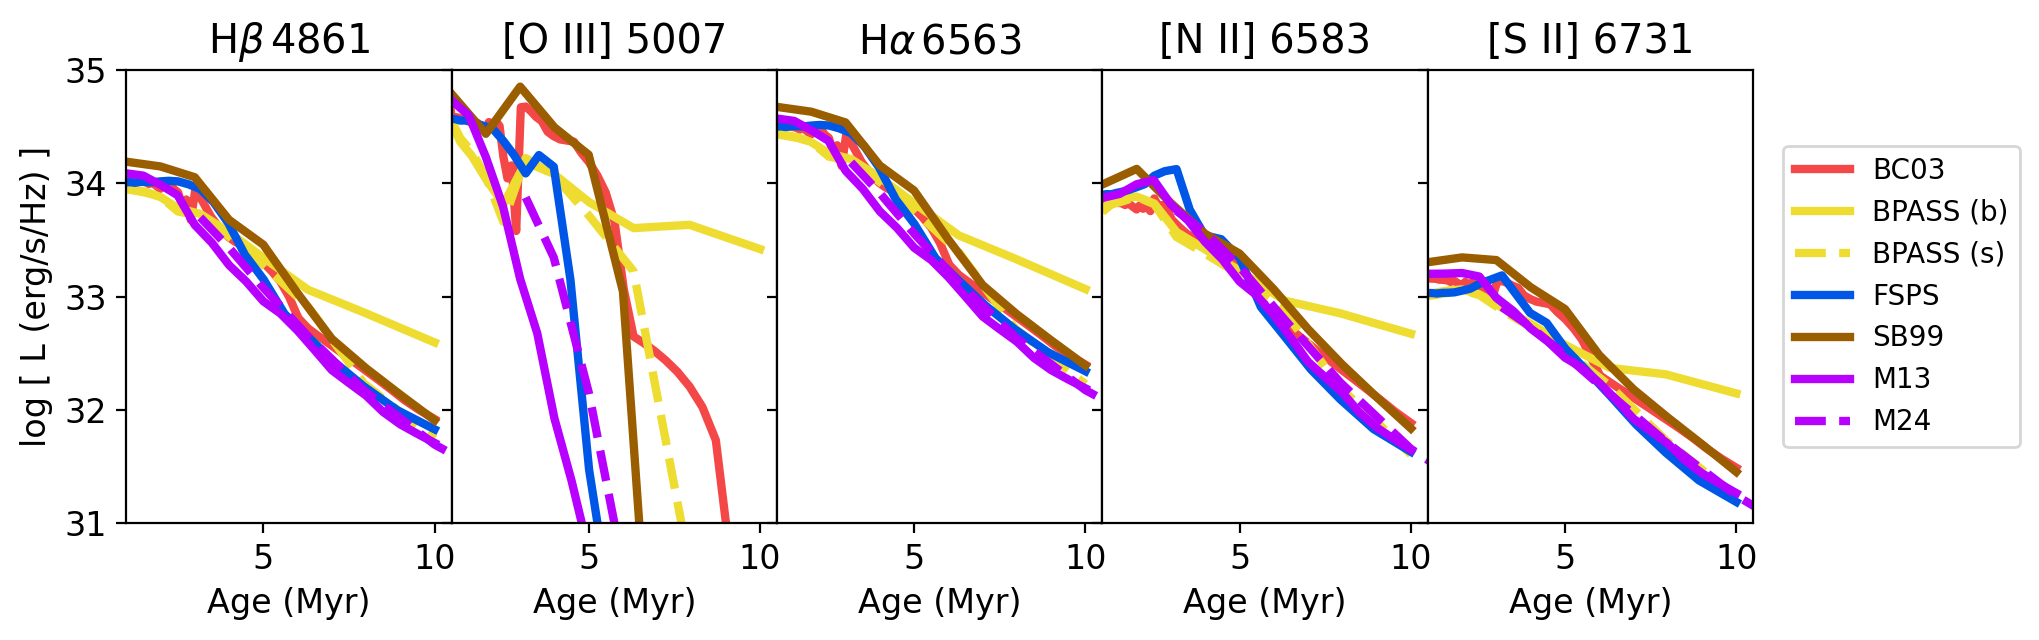

In [4]:
colors = ["#f44747", "#eedc31", "#0057e7", "#9a5d00", "#b700ff"]

colors_to_plot = [colors[0], colors[1], colors[1], colors[2], colors[3], colors[4], colors[4]]
linestyles = ['-', '-', '--', '-', '-', '-', '--']

fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True)  # 1 row, 5 columns 

line_ids = ['H 1 4861.32A', 'O 3 5006.84A', 'H 1 6562.80A', 'N 2 6583.45A', 'S 2 6730.82A']
line_label = [r'H$\beta \, 4861$', '[O III] 5007', r'H$\alpha \, 6563$', '[N II] 6583', '[S II] 6731']

grids = [grid_bc03, grid_bpass, grid_bpass_single, grid_fsps, grid_sb99, grid_m13, grid_m24]
grid_name = ['BC03', 'BPASS (b)', 'BPASS (s)', 'FSPS', 'SB99', 'M13', 'M24']


Z = 0.02

for line, ax in enumerate(axes):
    ax.set_title(line_label[line])

    for idx, grid in enumerate(grids) :

            x = []
            y = []
            line_lum = []
            
            for ia, log10age in enumerate(grid.log10age):

                grid_point = grid.get_grid_point((log10age,Z))

                sed_incident = grid.get_spectra(grid_point, spectra_id="incident")

                #get luminosity of line 
                wanted_line = grid.get_line(grid_point, line_ids[line])
                line_lum.append( wanted_line.luminosity )


            ax.plot(10**(grid.log10age)/1e6, np.log10(line_lum), c=colors_to_plot[idx], label=grid_name[idx], lw=3, ls=linestyles[idx]) 
            ax.set_xlim(left=1)
            ax.set_ylim(top = 35, bottom=31)
            ax.set_xlabel('Age (Myr)')

plt.tight_layout()
axes[0].set_ylabel('log [ L (erg/s/Hz) ]')

axes[4].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)

plt.tight_layout(pad=0)  # Set padding between subplots to zero
plt.subplots_adjust(wspace=0)

# Then, plot the ionizing photon production rate for [O III] that is in Figure 13

BC03 8.475025417495499e+44 1/s 2.1606711488025425e+44 1/s
BPASS (b) 6.543796248736387e+41 1/s 1.3962134755193507e+40 1/s
BPASS (s) 8.927004363210098e+41 1/s 8.666540527163144e+34 1/s
FSPS 4.0197411037473e+42 1/s 9.918063812320273e+38 1/s
SB99 7.054929603458055e+44 1/s 7.054929603458055e+44 1/s
M13 5.1141263362510144e+42 1/s 3.2869230804754273e+35 1/s
M24 2.0250351969798926e+42 1/s 2.0250351969798926e+42 1/s


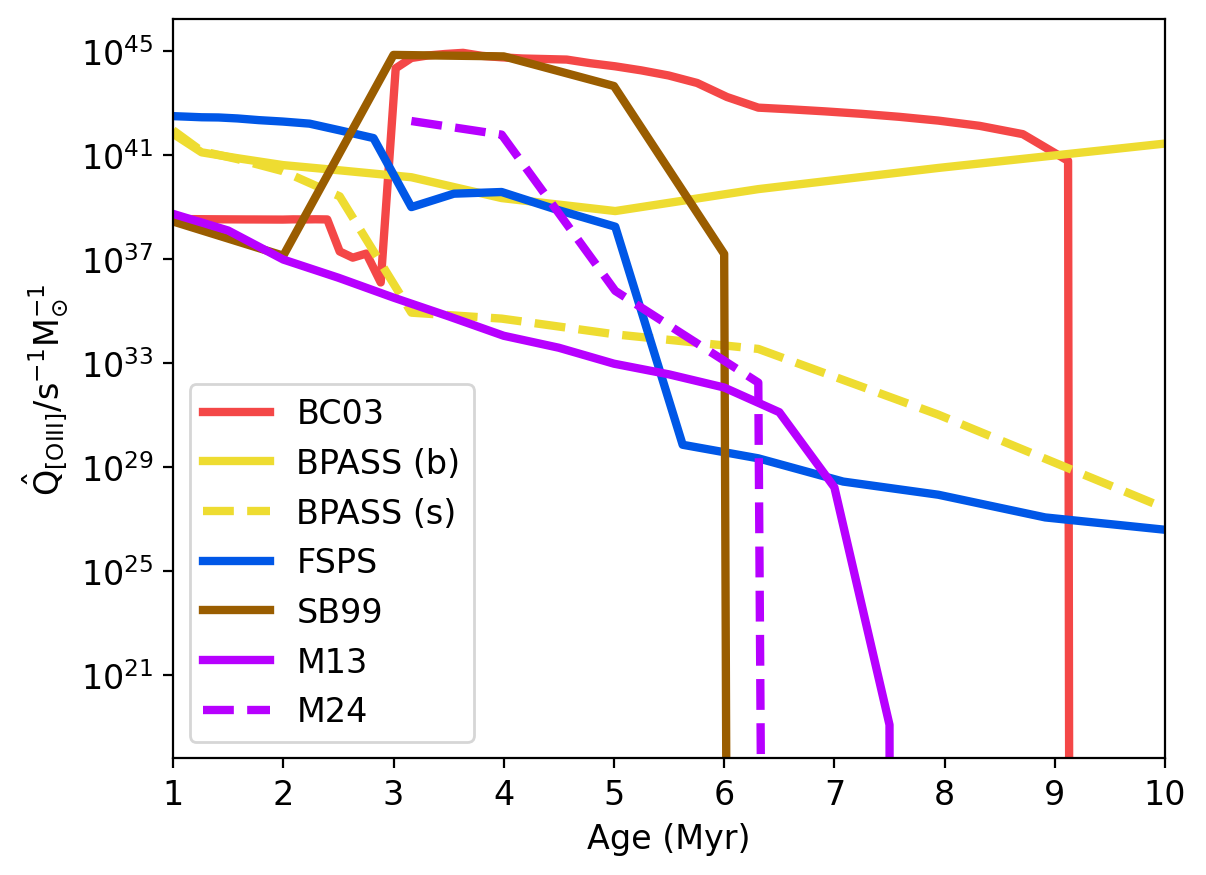

In [8]:
grids = [grid_bc03, grid_bpass, grid_bpass_single, grid_fsps, grid_sb99, grid_m13, grid_m24]
grid_name = ['BC03', 'BPASS (b)', 'BPASS (s)', 'FSPS', 'SB99', 'M13', 'M24']

spectra_id = "incident"

Z = 0.02

colors = ["#f44747", "#eedc31", "#0057e7", "#9a5d00", "#b700ff"]
colors_to_plot = [colors[0], colors[1], colors[1], colors[2], colors[3], colors[4], colors[4]]
linestyles = ['-', '-', '--', '-', '-', '-', '--']
for ig, grid in enumerate(grids):

    y = [] 

    for ia, log10age in enumerate(grid.log10age):

        grid_point = grid.get_grid_point((log10age,Z))

        sed = grid.get_spectra(grid_point, spectra_id=spectra_id)

        Q = sed.calculate_ionising_photon_production_rate(
            ionisation_energy = 54.9 * eV, limit=1000
        )

        y.append(Q)

    plt.plot(10**(grid.log10age)/10**6, y, c=colors_to_plot[ig], lw=3, label=grid_name[ig], ls=linestyles[ig])

plt.xlabel('Age (Myr)')
plt.ylabel(r'$\rm \hat{Q}_{[O III]}/s^{-1}M_{\odot}^{-1}$')
plt.xlim(left=1, right=10)
plt.yscale('log')
plt.legend()

# Figure 14: Emission line strengths for He II 1640, [O III]1661,1666 and C III]1909

/home/sophienewman/miniconda3/envs/synth/lib/python3.10/site-packages/synthesizer/grid.py:780: FutureWarning: Line objects should be created with a string id, not a list or tuple. This will be removed in a future version.
  Line(


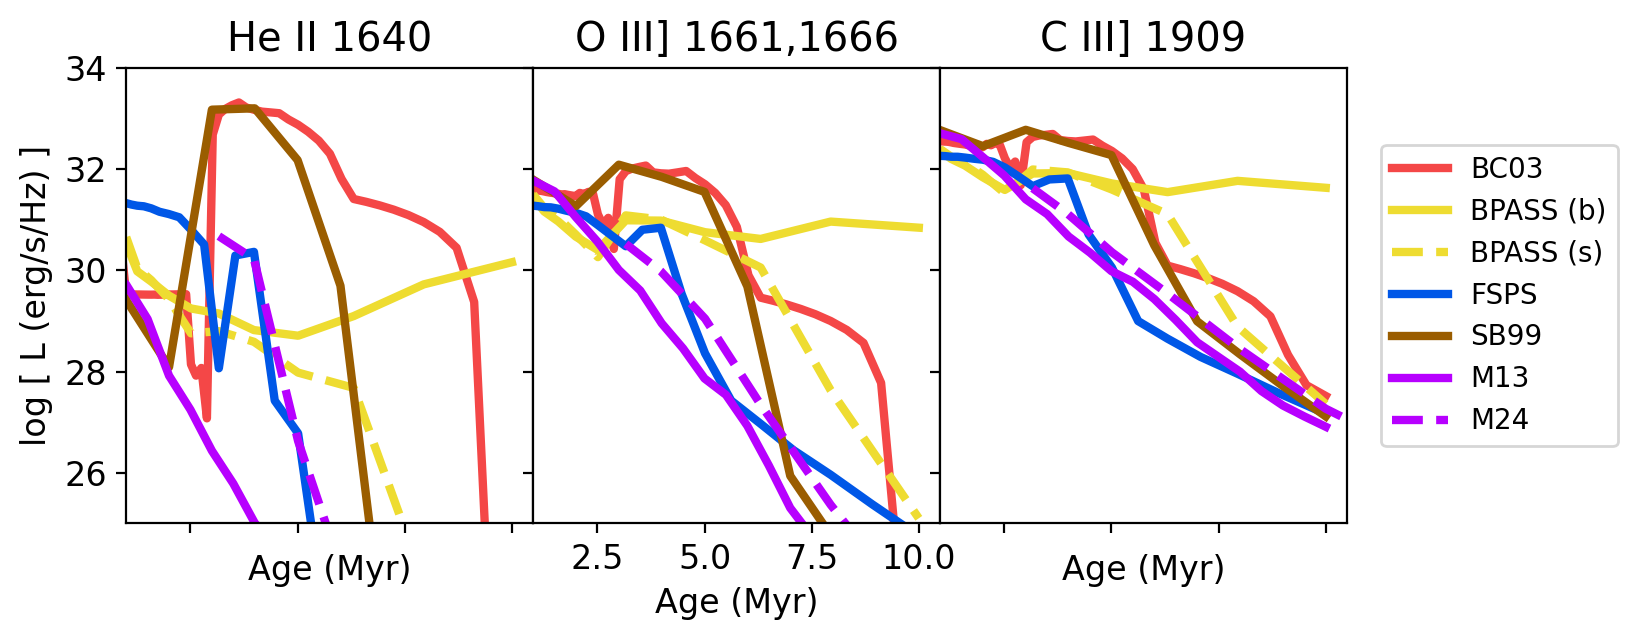

In [9]:
colors = ["#f44747", "#eedc31", "#0057e7", "#9a5d00", "#b700ff"]
colors_to_plot = [colors[0], colors[1], colors[1], colors[2], colors[3], colors[4], colors[4]]
linestyles = ['-', '-', '--', '-', '-', '-', '--']

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)  # 1 row, 5 columns

line_ids = ['He 2 1640.41A', ['O 3 1660.81A', 'O 3 1666.15A'], 'C 3 1908.73A', ]
line_label = ['He II 1640', 'O III] 1661,1666', 'C III] 1909']

grids = [grid_bc03, grid_bpass, grid_bpass_single, grid_fsps, grid_sb99, grid_m13, grid_m24]
grid_name = ['BC03', 'BPASS (b)', 'BPASS (s)', 'FSPS', 'SB99', 'M13', 'M24']


Z = 0.02

for line, ax in enumerate(axes):
    ax.set_title(line_label[line])

    for idx, grid in enumerate(grids) :

            x = []
            y = []
            line_lum = []
            
            for ia, log10age in enumerate(grid.log10age):

                grid_point = grid.get_grid_point((log10age,Z))

                sed_incident = grid.get_spectra(grid_point, spectra_id="incident")

                #get luminosity of line 
                wanted_line = grid.get_line(grid_point, line_ids[line])
                line_lum.append( wanted_line.luminosity )


            ax.plot(10**(grid.log10age)/1e6, np.log10(line_lum), c=colors_to_plot[idx], label=grid_name[idx], lw=3, ls=linestyles[idx]) 
            ax.set_xlim(left=1)
            ax.set_ylim(top = 34, bottom=25)
            ax.set_xlabel('Age (Myr)')

plt.tight_layout()
axes[0].set_ylabel('log [ L (erg/s/Hz) ]')

axes[0].set_xticklabels([])  # First panel: remove x tick labels
axes[2].set_xticklabels([])  # Last panel: remove x tick labels

axes[2].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)

plt.tight_layout(pad=0)  # Set padding between subplots to zero
plt.subplots_adjust(wspace=0)